In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler


predictors = ['cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year']
target = 'mpg'

df = pd.read_csv('https://www.statlearning.com/s/Auto.csv', na_values='?')
print(df)
df = df[predictors + [target]]

df = df.sample(frac=1.)
train = df[:int(len(df) * 0.8)]
test = df[int(len(df) * 0.8):]
print(f'Using {len(train)} samples for training and {len(test)} for testing')

test.loc[np.isnan(df['horsepower']), 'horsepower'] = np.nanmean(test['horsepower'])
train.loc[np.isnan(df['horsepower']), 'horsepower'] = np.nanmean(train['horsepower'])

scaler = StandardScaler()
train[predictors] = scaler.fit_transform(train[predictors])
test[predictors] = scaler.transform(test[predictors])

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet

/tmp/ipykernel_1155344/4198312716.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[predictors] = scaler.fit_transform(train[predictors])
/tmp/ipykernel_1155344/4198312716.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[predictors] = scaler.transform(test[predictors])


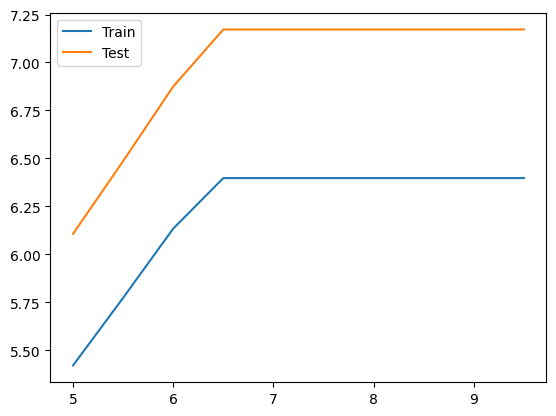

In [9]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lambdas = np.arange(5, 10, 0.5)
train_maes = []
test_maes = []

for l in lambdas:
    model = Lasso(l)
    model.fit(train[predictors], train[target])
    train_predictions = model.predict(train[predictors])
    train_maes.append(mean_absolute_error(train[target], train_predictions))
    test_predictions = model.predict(test[predictors])
    test_maes.append(mean_absolute_error(test[target], test_predictions))

plt.plot(lambdas, train_maes, label='Train')
plt.plot(lambdas, test_maes, label='Test')
plt.legend()
plt.show()